In [1]:
import tensorflow as tf
from transformers import BertTokenizer, TFBertForSequenceClassification
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

c:\Users\brids\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
data = pd.read_csv("C:/Users/brids/Downloads/cleaned_WELFake_Dataset.csv")
data = data.iloc[:1000, :]
data

,Unnamed: 0,label,cleaned_title,cleaned_text
0,0,1,LAW ENFORCEMENT ON HIGH ALE Following Threats ...,No comment is expected from Barack Obama Membe...
1,2,1,UNBELIEVABLE OBAMA S ATTORNEY GENERAL SAYS MOS...,Now most of the demonstrators gathered last n...
2,3,0,Bobby Jindal raised Hindu uses story of Christ...,A dozen politically active pastors came here f...
3,4,1,SATAN 2 Russia unvelis an image of its terrify...,The RS 28 Sarmat missile dubbed Satan 2 will r...
4,5,1,About Time Christian Group Sues Amazon and SPL...,All we can say on this one is it s about time ...
...,...,...,...,...
995,1023,0,Myanmar says working to ensure returns of Rohi...,GENEVA Reuters Myanmar told the United Nations...
996,1024,0,Campaigning in style How Jeb Bush blew through...,NEW YORK Reuters There were stays at boutique...
997,1025,0,Los Angeles Times Editorial Loses It over Trum...,The Los Angeles Times which did its best it ad...
998,1026,1,ZeroCash A Cryptocurrency s Deep State Ties,in Science Technology October 28 2016 marks th...


In [4]:
train_texts, test_texts, train_labels, test_labels = train_test_split(data['cleaned_text'], data['label'], test_size=0.2, random_state=42)

In [5]:
print(train_texts)
print(test_texts)

29     When Tidjane Thiam took over at Credit Suisse ...
535    WASHINGTON Reuters A committee that raises mon...
695    The wicked witch of the White House makes Amer...
557    Politifact just humiliated Senate Republicans ...
836    DENPASAR Indonesia Reuters Indonesian police a...
                             ...                        
106    Assuming Hillary Clinton wins Tuesday s electi...
270    Our culture is what makes this Nation great an...
860    WASHINGTON Reuters The U S Congress on Thursda...
435    TIJUANA Mexico Even before President Trump dec...
102    Remember when illegal aliens students and resi...
Name: cleaned_text, Length: 800, dtype: object
521    Mark Ruffalo is one the movie industry s most ...
737    Writing in an encrypted chat room Islamic Stat...
740    Experts Recommend Breaking Down Crushing Defea...
660     I today I wrote in Arabic The republic will n...
411    ALPHARETTA Ga A gray mood has settled over vot...
                             ...         

In [6]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
train_encodings = tokenizer(train_texts.tolist(), truncation=True, padding=True, max_length=128, return_tensors='tf')
test_encodings = tokenizer(test_texts.tolist(), truncation=True, padding=True, max_length=128, return_tensors='tf')

c:\Users\brids\AppData\Local\Programs\Python\Python39\lib\site-packages\huggingface_hub\file_download.py:157: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\brids\.cache\huggingface\hub\models--bert-base-uncased. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
c:\Users\brids\AppData\Local\Programs\Python\Python39\lib\site-packages\huggingface_hub\file_d

In [29]:
print(len(train_texts))
print(len(test_texts))
print(len(train_labels))
print(len(test_labels))


800
200
800
200


In [28]:
print(train_labels.shape)


(800,)


In [9]:
train_dataset = tf.data.Dataset.from_tensor_slices((
    dict(train_encodings),
    train_labels
))

test_dataset = tf.data.Dataset.from_tensor_slices((
    dict(test_encodings),
    test_labels
))

In [10]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from transformers import TFBertForSequenceClassification

model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

optimizer = Adam(learning_rate=2e-5)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metric = tf.keras.metrics.SparseCategoricalAccuracy('accuracy')

model.compile(optimizer=optimizer, loss=loss, metrics=[metric])


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [11]:
model.fit(train_dataset.shuffle(1000).batch(16), epochs=3, batch_size=16, validation_data=test_dataset.batch(16))

Epoch 1/3

50/50 [==============================] - 534s 10s/step - loss: 0.4817 - accuracy: 0.7937 - val_loss: 0.3830 - val_accuracy: 0.8300
Epoch 2/3
50/50 [==============================] - 571s 11s/step - loss: 0.2677 - accuracy: 0.8888 - val_loss: 0.3797 - val_accuracy: 0.8300
Epoch 3/3
50/50 [==============================] - 466s 9s/step - loss: 0.1646 - accuracy: 0.9450 - val_loss: 0.3185 - val_accuracy: 0.8750


In [12]:
results = model.evaluate(test_dataset.batch(16), return_dict=True)
print(results)

13/13 [==============================] - 29s 2s/step - loss: 0.3185 - accuracy: 0.8750
{'loss': 0.3184957802295685, 'accuracy': 0.875}


In [13]:
new_text = ['einstein is alive']
new_encoding = tokenizer(new_text, truncation=True, padding=True, max_length=128, return_tensors='tf')

input_ids = new_encoding['input_ids']
token_type_ids = new_encoding['token_type_ids']
attention_mask = new_encoding['attention_mask']


predictions = model.predict([input_ids, token_type_ids, attention_mask])
predicted_label = np.argmax(predictions[0])
print("The news is: ", "Fake" if predicted_label == 0 else "Real")
probabilities = tf.nn.softmax(predictions[0])

if predicted_label == 0:
  fake_probability = probabilities[0]
  print("Probability of being fake news:", fake_probability.numpy()[0] * 100)
else:
  real_probability = probabilities[0]
  print("Probability of being real news:", real_probability.numpy()[1] * 100)



1/1 [==============================] - 4s 4s/step
The news is:  Real
Probability of being real news: 82.54013657569885


In [15]:
from sklearn.metrics import classification_report

# Get predictions on the test dataset
predictions = model.predict(test_dataset.batch(16))
predicted_labels = np.argmax(predictions.logits, axis=1)

# Print classification report
print(classification_report(test_labels, predicted_labels))

13/13 [==============================] - 30s 2s/step
              precision    recall  f1-score   support

           0       0.95      0.77      0.85        92
           1       0.83      0.96      0.89       108

    accuracy                           0.88       200
   macro avg       0.89      0.87      0.87       200
weighted avg       0.88      0.88      0.87       200



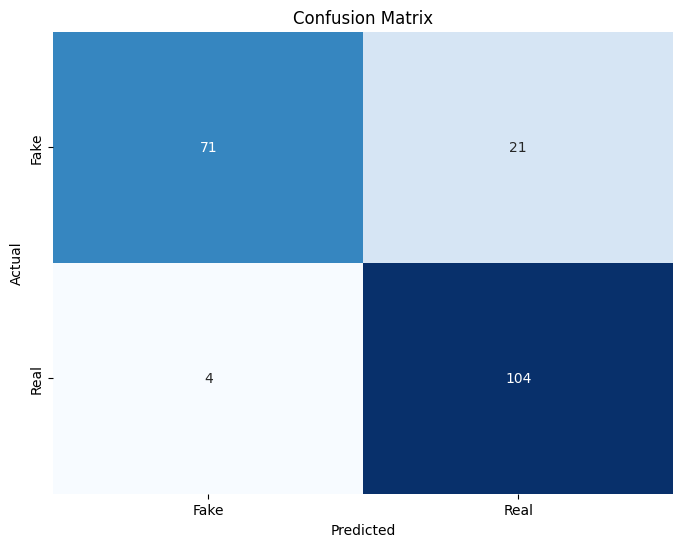

In [19]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

true_labels = test_labels.values

# Compute the confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)
label_names = ['Fake', 'Real']

conf_matrix_df = pd.DataFrame(conf_matrix, index=label_names, columns=label_names)

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [20]:
probabilities = tf.nn.softmax(predictions.logits, axis=1).numpy()

# Get the probability of the positive class (class 1)
positive_class_probs = probabilities[:, 1]

In [21]:
from sklearn.metrics import roc_curve

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(test_labels, positive_class_probs)

In [22]:
from sklearn.metrics import roc_auc_score

# Compute the AUC
auc_score = roc_auc_score(test_labels, positive_class_probs)
print("AUC Score:", auc_score)

AUC Score: 0.943035426731079


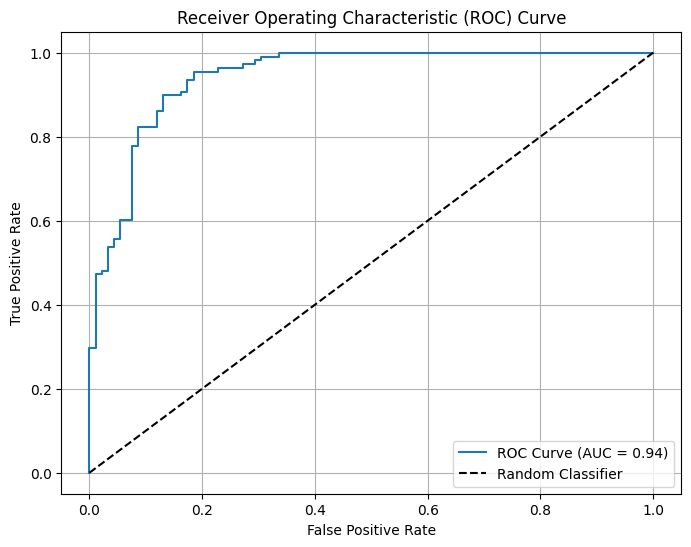

In [23]:
# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='best')
plt.grid()
plt.show()

In [24]:
fake_class_probs = probabilities[:, 0]
real_class_probs = probabilities[:, 1]

In [25]:
# Compute ROC curve for class 0 (Fake)
fpr_fake, tpr_fake, _ = roc_curve(test_labels, fake_class_probs, pos_label=0)

# Compute ROC curve for class 1 (Real)
fpr_real, tpr_real, _ = roc_curve(test_labels, real_class_probs, pos_label=1)

In [26]:
auc_fake = roc_auc_score(test_labels == 0, fake_class_probs)
print("AUC for Fake class:", auc_fake)

# Compute AUC for class 1 (Real)
auc_real = roc_auc_score(test_labels == 1, real_class_probs)
print("AUC for Real class:", auc_real)

AUC for Fake class: 0.943035426731079
AUC for Real class: 0.943035426731079


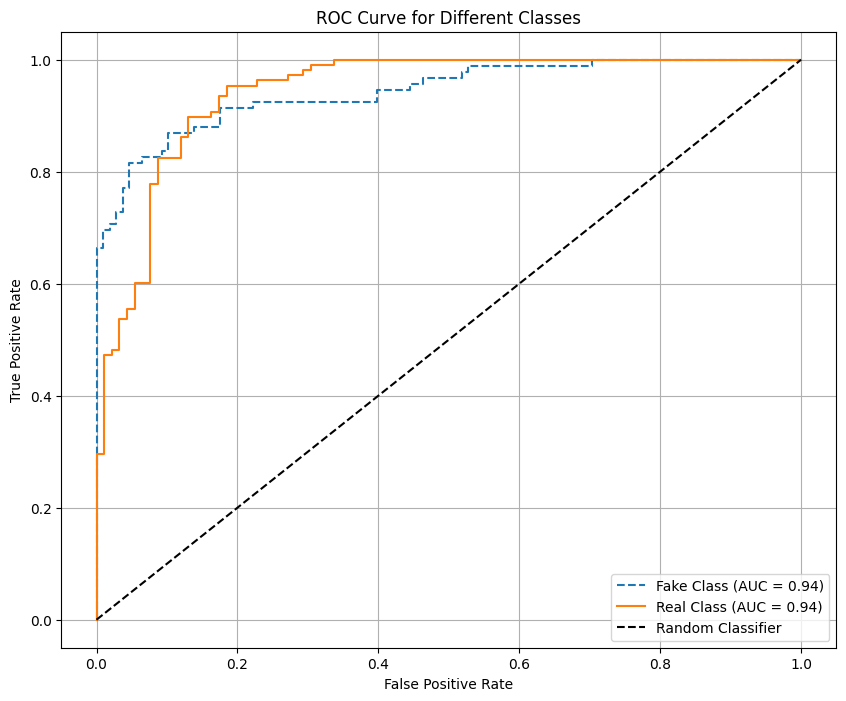

In [27]:
import matplotlib.pyplot as plt

# Plot ROC curves for both classes
plt.figure(figsize=(10, 8))

# ROC curve for Fake class
plt.plot(fpr_fake, tpr_fake, label=f'Fake Class (AUC = {auc_fake:.2f})', linestyle='--')

# ROC curve for Real class
plt.plot(fpr_real, tpr_real, label=f'Real Class (AUC = {auc_real:.2f})')

# Plot the diagonal line
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')

# Customize the plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Different Classes')
plt.legend(loc='best')
plt.grid(True)

# Show the plot
plt.show()
